<a href="https://colab.research.google.com/github/AmanPriyanshu/Discussing_Learning/blob/master/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUTOENCODERS:

An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”. Along with the reduction side, a reconstructing side is learnt, where the autoencoder tries to generate from the reduced encoding a representation as close as possible to its original input, hence its name.

## INTRODUCTION:

An autoencoder is a neural network that learns to copy its input to its output. It has an internal (hidden) layer that describes a code used to represent the input, and it is constituted by two main parts: an encoder that maps the input into the code, and a decoder that maps the code to a reconstruction of the original input.

Performing the copying task perfectly would simply duplicate the signal, and this is why autoencoders usually are restricted in ways that force them to reconstruct the input approximately, preserving only the most relevant aspects of the data in the copy.

Their most traditional application was dimensionality reduction or feature learning, but more recently the autoencoder concept has become more widely used for learning generative models of data and anomaly detection. 

## BASIC ARCHITECTURE:

The simplest form of an autoencoder is a feedforward, non-recurrent neural network similar to single layer perceptrons that participate in multilayer perceptrons (MLP) – having an input layer, an output layer and one or more hidden layers connecting them – where the output layer has the same number of nodes (neurons) as the input layer, and with the purpose of reconstructing its inputs (minimizing the difference between the input and the output) instead of predicting the target value Y given inputsX. Therefore, autoencoders are unsupervised learning models (do not require labeled inputs to enable learning).

An autoencoder consists of two parts, the encoder and the decoder, which can be defined as transitions Φ and Ψ such that:

image.png

image.png

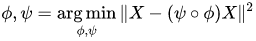

Now, we know that F can have more than one layers. Let us represent this encosing method in a image format:

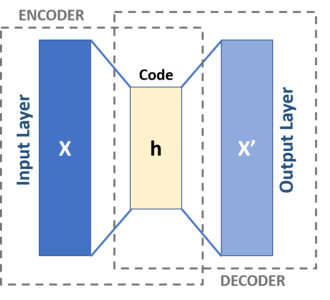

This, h, is usually referred to as code, latent variables, or latent representation. Autoencoders are trained to minimise reconstruction errors (such as squared errors) like MSE.

Should the feature space F have lower dimensionality than the input space X, the feature vector Φ(x) can be regarded as a compressed representation of the input x. This is the case of undercomplete autoencoders. If the hidden layers are larger than (overcomplete autoencoders), or equal to, the input layer, or the hidden units are given enough capacity, an autoencoder can potentially learn the identity function and become useless. However, experimental results have shown that autoencoders might still learn useful features in these cases.

## ANOMALY DETECTION USING AUTOENCODERS:

An important field of application for autoencoders is anomaly detection. By learning to replicate the most salient features in the training data under some of the constraints described previously, the model is encouraged to learn how to precisely reproduce the most frequent characteristics of the observations. When facing anomalies, the model should worsen its reconstruction performance. In most cases, only data with normal instances are used to train the autoencoder; in others, the frequency of anomalies is so small compared to the whole population of observations, that its contribution to the representation learnt by the model could be ignored. After training, the autoencoder will reconstruct normal data very well, while failing to do so with anomaly data which the autoencoder has not encountered. Reconstruction error of a data point, which is the error between the original data point and its low dimensional reconstruction, is used as an anomaly score to detect anomalies.



### EXPLAINATION:

Since autoencoders reduce dimensions in Latent Space. Therefore, the weights and biases within the model will develop to encode and decode input. This leads to AutoEncoders being trianed on only, Normal cases, thereby learning only the latent features of the Normal Cases and therefore, upon coming across any Anomaly will not be able to decode it efficiently. We will be seeing a greater loss than what is generally seen.



## OPTIMIZER - ADAM:

These are important parts of any MACHINE LEARNING Code the optimizer allows us to train faster and better. It allows us to better implement and utilize both a bigger learning rate and a smaller one.

The choice of optimization algorithm for your deep learning model can mean the difference between good results in minutes, hours, and days.

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

Adam was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“. I will quote liberally from their paper in this post, unless stated otherwise.

Adam is different to classical stochastic gradient descent.

Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.
A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.

The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.

The authors describe Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

* Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
* Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam realizes the benefits of both AdaGrad and RMSProp.
Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).

Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.

The initial value of the moving averages and beta1 and beta2 values close to 1.0 (recommended) result in a bias of moment estimates towards zero. This bias is overcome by first calculating the biased estimates before then calculating bias-corrected estimates.

#### Adam Configuration Parameters
* alpha: also referred to as the learning rate or step size. The proportion that weights are updated (e.g. 0.001). Larger values (e.g. 0.3) results in faster initial learning before the rate is updated. Smaller values (e.g. 1.0E-5) slow learning right down during training
* beta1. The exponential decay rate for the first moment estimates (e.g. 0.9).
* beta2. The exponential decay rate for the second-moment estimates (e.g. 0.999). This value should be set close to 1.0 on problems with a sparse gradient (e.g. NLP and computer vision problems).
* epsilon. Is a very small number to prevent any division by zero in the implementation (e.g. 10E-8).

In Adam, the paper uses a decay rate alpha = alpha/sqrt(t) updated each epoch (t) for the logistic regression demonstration.

The Adam paper suggests:
* alpha=0.001, 
* beta1=0.9,
* beta2=0.999, 
* epsilon=10−8

Now let us begin by presenting trhe formulae,
Moving averages of gradient and squared gradient.

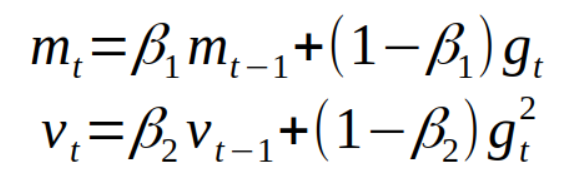

followed by, which is the error correction. Bias corrected estimators for the first and second moments.

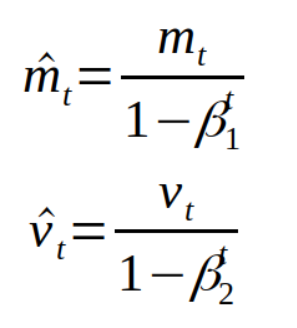

Final Weight update takes place by,

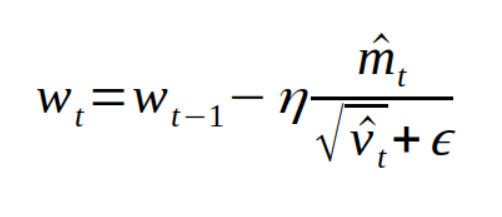

```python
for t in range(num_iterations):
    g = compute_gradient(x, y)
    m = beta_1 * m + (1 - beta_1) * g
    v = beta_2 * v + (1 - beta_2) * np.power(g, 2)
    m_hat = m / (1 - np.power(beta_1, t))
    v_hat = v / (1 - np.power(beta_2, t))
    w = w - step_size * m_hat / (np.sqrt(v_hat) + epsilon)
```

IMPORTANCE OF ADAM:

Properties of Adam, for proof that these are true refer to the paper.
* Actual step size taken by the Adam in each iteration is approximately bounded the step size hyper-parameter. This property add intuitive understanding to previous unintuitive learning rate hyper-parameter.
* Step size of Adam update rule is invariant to the magnitude of the gradient, which helps a lot when going through areas with tiny gradients (such as saddle points or ravines). In these areas SGD struggles to quickly navigate through them.
* Adam was designed to combine the advantages of Adagrad, which works well with sparse gradients, and RMSprop, which works well in on-line settings. Having both of these enables us to use Adam for broader range of tasks. Adam can also be looked at as the combination of RMSprop and SGD with momentum.